# Grief to Action Python Workshop: Feb 29, 2024

## Pittsburgh Police Arrest Data
Data</br>
https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f?inner_span=True</br></br>
Data Dictionary</br>
https://data.wprdc.org/dataset/arrest-data/resource/e554650d-f48f-49b2-88f3-e19878a1c245?inner_span=True</br></br>

## Pittsburgh Police Non-Traffic Citation Data
Data</br>
https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86</br></br>
Data Dictionary</br>
https://data.wprdc.org/dataset/non-traffic-citations/resource/ec71e915-cd01-4281-86c0-2d3a06701616

## Read in combined CSV file from your Google drive
marijuana_arrests_and_citations_2017_thru_2022.csv


## Objectives of this Notebook

After reviewing this notebook, you will establish a foundation for further learning and exploration of the following concepts

*   Visualize arrests and citations

## Import packages

https://learnpython.com/blog/python-libraries-for-beginners/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### Connect to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read combined arrests and citations CSV file

In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/marijuana_arrests_and_citations_2017_thru_2022.csv'

In [4]:
mj_df = pd.read_csv(url, low_memory = False)

In [5]:
mj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12612 entries, 0 to 12611
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  12612 non-null  int64  
 1   _id                    12612 non-null  int64  
 2   PK                     12612 non-null  int64  
 3   CCR                    12612 non-null  int64  
 4   AGE                    12573 non-null  float64
 5   GENDER                 12611 non-null  object 
 6   RACE                   12611 non-null  object 
 7   TIME                   12612 non-null  object 
 8   ARRESTLOCATION         11444 non-null  object 
 9   OFFENSES               12612 non-null  object 
 10  INCIDENTLOCATION       12612 non-null  object 
 11  INCIDENTNEIGHBORHOOD   12326 non-null  object 
 12  INCIDENTZONE           12602 non-null  object 
 13  INCIDENTTRACT          12335 non-null  object 
 14  COUNCIL_DISTRICT       10976 non-null  float64
 15  PU

In [6]:
mj_df['record_type'].value_counts()

Arrest      11444
Citation     1168
Name: record_type, dtype: int64

## Summarize by police zone, race, and both

In [7]:
mj_test = mj_df.groupby(['INCIDENTZONE']).\
            aggregate(mj_count_zone = ('OFFENSES', 'count')).\
            reset_index()

In [8]:
mj_test

,INCIDENTZONE,mj_count_zone
0,OSC,145
1,Zone 1,3071
2,Zone 2,1721
3,Zone 3,2222
4,Zone 4,1102
5,Zone 5,3357
6,Zone 6,984


In [9]:
mj_test2 = mj_df.groupby(['INCIDENTZONE', 'record_type']).\
            aggregate(mj_count_zone = ('OFFENSES', 'count'))

In [10]:
mj_test2

mj_count_zone
INCIDENTZONE record_type               
OSC          Arrest                 141
             Citation                 4
Zone 1       Arrest                2966
             Citation               105
Zone 2       Arrest                1619
             Citation               102
Zone 3       Arrest                1971
             Citation               251
Zone 4       Arrest                 940
             Citation               162
Zone 5       Arrest                2929
             Citation               428
Zone 6       Arrest                 868
             Citation               116

In [11]:
mj_by_zone = mj_df.groupby(['INCIDENTZONE', 'record_type']).\
            aggregate(mj_count_zone = ('OFFENSES', 'count')).\
            reset_index().copy()

In [12]:
mj_by_zone = mj_df.groupby(['INCIDENTZONE','record_type']).\
            aggregate(mj_count_zone = ('OFFENSES', 'count')).\
            reset_index().copy()

In [13]:
mj_by_zone

,INCIDENTZONE,record_type,mj_count_zone
0,OSC,Arrest,141
1,OSC,Citation,4
2,Zone 1,Arrest,2966
3,Zone 1,Citation,105
4,Zone 2,Arrest,1619
5,Zone 2,Citation,102
6,Zone 3,Arrest,1971
7,Zone 3,Citation,251
8,Zone 4,Arrest,940
9,Zone 4,Citation,162


In [14]:
mj_by_race = mj_df.groupby(['RACE', 'record_type']).\
            aggregate(mj_count_race = ('OFFENSES', 'count')).\
            reset_index().copy()

In [15]:
mj_by_race

,RACE,record_type,mj_count_race
0,A,Arrest,19
1,A,Citation,3
2,B,Arrest,7123
3,B,Citation,914
4,H,Arrest,72
5,H,Citation,10
6,I,Arrest,4
7,I,Citation,1
8,O,Arrest,74
9,O,Citation,21


Note: The summary below does not mean anything without knowing the distribution of race in each zone.

In [16]:
mj_by_gender = mj_df.groupby(['GENDER', 'record_type']).\
            aggregate(mj_count_gender = ('OFFENSES', 'count')).\
            reset_index().copy()

In [17]:
mj_by_gender

,GENDER,record_type,mj_count_gender
0,F,Arrest,2627
1,F,Citation,185
2,M,Arrest,8803
3,M,Citation,982
4,U,Arrest,14


## Visualize with matplotlib

In [18]:
# define Seaborn color palette to use
#palette_color = sns.color_palette('colorblind')

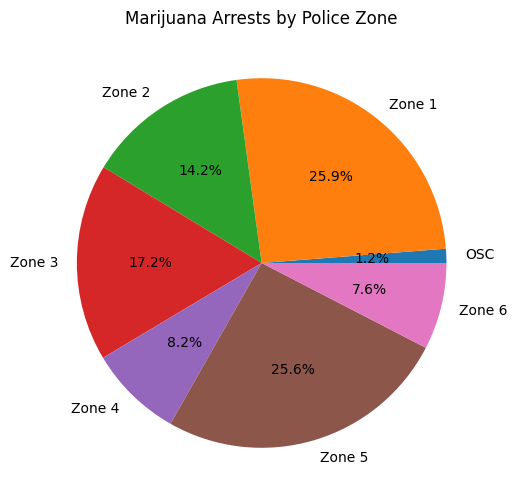

In [19]:
plt.figure(figsize=(6,6))

plt.pie(mj_by_zone['mj_count_zone'].loc[mj_by_zone['record_type']=='Arrest'],
        labels=mj_by_zone['INCIDENTZONE'].loc[mj_by_zone['record_type']=='Arrest'],
        autopct='%1.1f%%')

plt.title('Marijuana Arrests by Police Zone')
plt.savefig('Marijuana_arrests_by_zone.png')
plt.show()

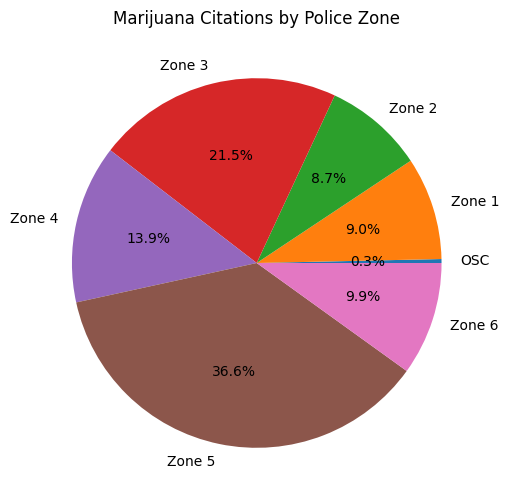

In [20]:
plt.figure(figsize=(6,6))

plt.pie(mj_by_zone['mj_count_zone'].loc[mj_by_zone['record_type']=='Citation'],
        labels=mj_by_zone['INCIDENTZONE'].loc[mj_by_zone['record_type']=='Citation'],
        autopct='%1.1f%%')

plt.title('Marijuana Citations by Police Zone')
plt.savefig('Marijuana_citations_by_zone.png')
plt.show()

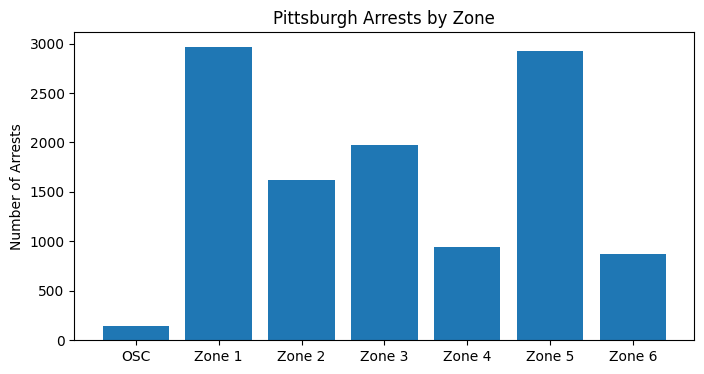

In [21]:
plt.figure(figsize=(8,4))
plt.bar(mj_by_zone['INCIDENTZONE'].loc[mj_by_zone['record_type']=='Arrest'],
        mj_by_zone['mj_count_zone'].loc[mj_by_zone['record_type']=='Arrest'],
        0.8)
plt.title('Pittsburgh Arrests by Zone')
plt.ylabel('Number of Arrests')
plt.show()

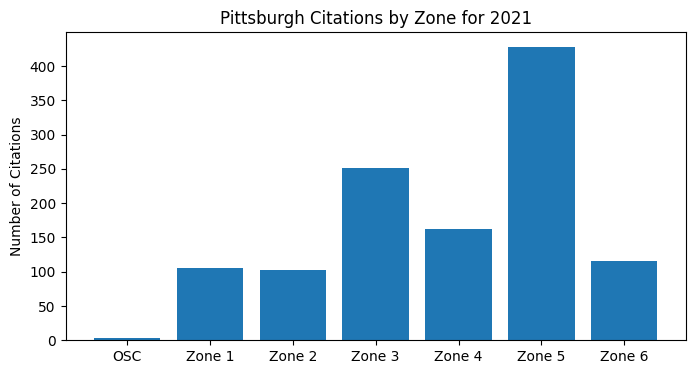

In [22]:
plt.figure(figsize=(8,4))
plt.bar(mj_by_zone['INCIDENTZONE'].loc[mj_by_zone['record_type']=='Citation'],
        mj_by_zone['mj_count_zone'].loc[mj_by_zone['record_type']=='Citation'], 0.8)
plt.title('Pittsburgh Citations by Zone for 2021')
plt.ylabel('Number of Citations')
plt.show()

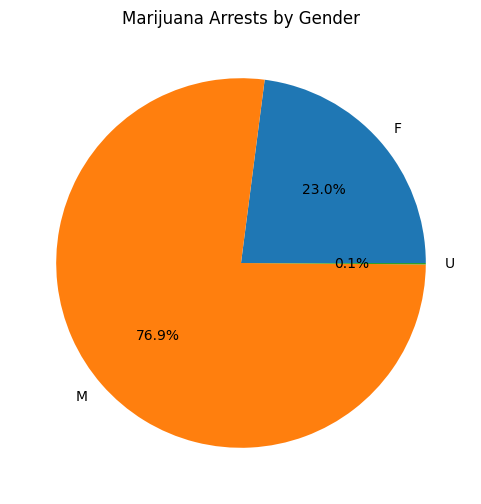

In [23]:
plt.figure(figsize=(6,6))

plt.pie(mj_by_gender['mj_count_gender'].loc[mj_by_gender['record_type']=='Arrest'],
        labels=mj_by_gender['GENDER'].loc[mj_by_gender['record_type']=='Arrest'],
        autopct='%1.1f%%')

plt.title('Marijuana Arrests by Gender')
plt.savefig('Marijuana_arrests_by_gender.png')
plt.show()

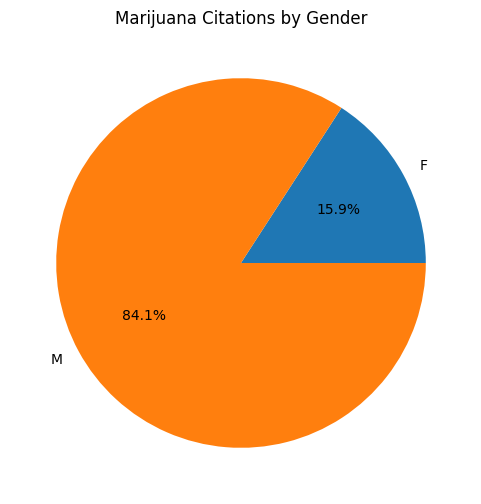

In [24]:
plt.figure(figsize=(6,6))

plt.pie(mj_by_gender['mj_count_gender'].loc[mj_by_gender['record_type']=='Citation'],
        labels=mj_by_gender['GENDER'].loc[mj_by_gender['record_type']=='Citation'],
        autopct='%1.1f%%')

plt.title('Marijuana Citations by Gender')
plt.savefig('Marijuana_citations_by_gender.png')
plt.show()

Limit race records to 'B','H','W'

In [25]:
mj_by_race_BHW = mj_by_race.loc[mj_by_race['RACE'].isin(['B','H','W'])].copy()

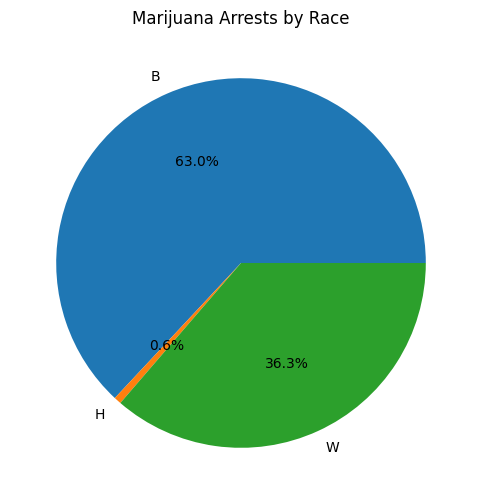

In [26]:
plt.figure(figsize=(6,6))

plt.pie(mj_by_race_BHW['mj_count_race'].loc[mj_by_race_BHW['record_type']=='Arrest'],
        labels=mj_by_race_BHW['RACE'].loc[mj_by_race_BHW['record_type']=='Arrest'],
        autopct='%1.1f%%')

plt.title('Marijuana Arrests by Race')
plt.savefig('Marijuana_arrests_by_race.png')
plt.show()

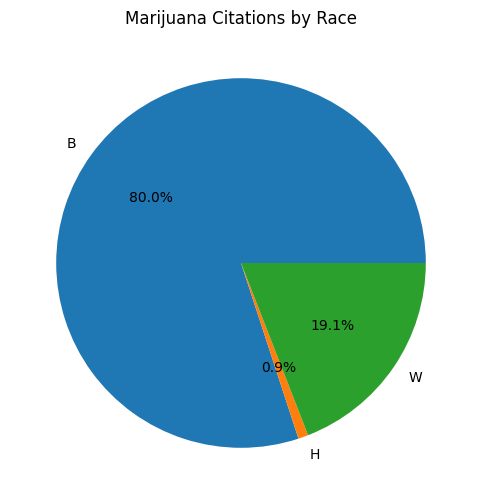

In [27]:
plt.figure(figsize=(6,6))

plt.pie(mj_by_race_BHW['mj_count_race'].loc[mj_by_race_BHW['record_type']=='Citation'],
        labels=mj_by_race_BHW['RACE'].loc[mj_by_race_BHW['record_type']=='Citation'],
        autopct='%1.1f%%')

plt.title('Marijuana Citations by Race')
plt.savefig('Marijuana_citations_by_race.png')
plt.show()

## Summarize by dates and create line plots

#### Create a YEAR variable

In [28]:
mj_df['TIME'] = pd.to_datetime(mj_df['TIME'])

In [29]:
mj_df['TIME'] = pd.to_datetime(mj_df['TIME'])

In [30]:
mj_df['TIME'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12612 entries, 0 to 12611
Series name: TIME
Non-Null Count  Dtype         
--------------  -----         
12612 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 98.7 KB


In [31]:
mj_df['YEAR'] = [x.year for x in mj_df['TIME']]

In [32]:
mj_df['YEAR'] = [x.year for x in mj_df['TIME']]

In [33]:
mj_df.tail()

,index,_id,PK,CCR,AGE,GENDER,RACE,TIME,ARRESTLOCATION,OFFENSES,...,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,record_type,marijuana_flag,YEAR
12607,14207,23810,1102683,22206375,29.0,M,B,2022-12-28 20:43:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,Larimer,Zone 5,1208,9.0,2.0,-79.915806,40.460814,Citation,1,2022
12608,14211,23814,1102687,22206961,19.0,M,W,2022-12-30 02:00:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,South Shore,Zone 3,1921,3.0,5.0,-80.000256,40.430975,Citation,1,2022
12609,14212,23815,1102688,22206961,19.0,M,B,2022-12-30 02:00:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,South Shore,Zone 3,1921,3.0,5.0,-80.000256,40.430975,Citation,1,2022
12610,14213,23816,1102689,22206961,20.0,M,B,2022-12-30 02:00:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,South Shore,Zone 3,1921,3.0,5.0,-80.000256,40.430975,Citation,1,2022
12611,14264,23867,1102781,22204681,35.0,M,B,2022-12-24 14:20:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,Bedford Dwellings,Zone 2,509,6.0,3.0,-79.973840,40.450983,Citation,1,2022


In [34]:
summ_by_year_df = mj_df.groupby(['YEAR', 'record_type']).\
            aggregate(rec_count=('TIME', 'count')).\
            reset_index().\
            copy()

In [35]:
mj_df['TIME'].isna().sum()

0

In [36]:
summ_by_year_df

,YEAR,record_type,rec_count
0,2017,Arrest,2841
1,2017,Citation,191
2,2018,Arrest,2504
3,2018,Citation,157
4,2019,Arrest,2392
5,2019,Citation,236
6,2020,Arrest,1732
7,2020,Citation,201
8,2021,Arrest,1136
9,2021,Citation,217


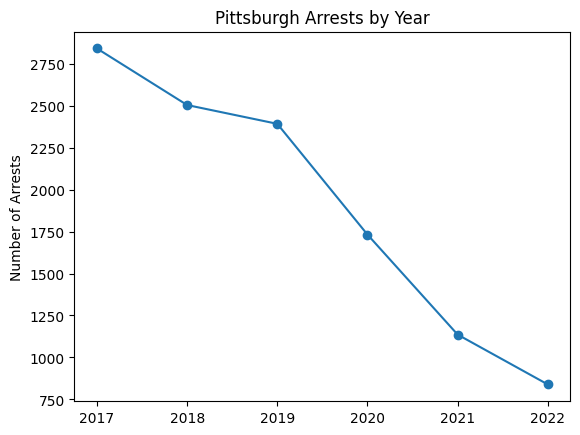

In [37]:
plt.plot(summ_by_year_df['YEAR'].loc[summ_by_year_df['record_type']=='Arrest'],
         summ_by_year_df['rec_count'].loc[summ_by_year_df['record_type']=='Arrest'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Year')
plt.ylabel('Number of Arrests')
plt.show()

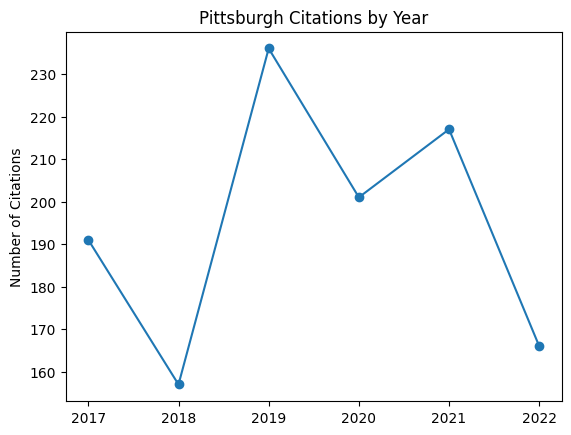

In [38]:
plt.plot(summ_by_year_df['YEAR'].loc[summ_by_year_df['record_type']=='Citation'],
         summ_by_year_df['rec_count'].loc[summ_by_year_df['record_type']=='Citation'], marker='o', linestyle='solid')
plt.title('Pittsburgh Citations by Year')
plt.ylabel('Number of Citations')
plt.show()

#### Create a variable to hold date formatted as year-month

In [39]:
mj_df['MNYR'] = mj_df['TIME'].dt.strftime('%Y-%m')

In [40]:
mj_df['MNYR'].unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12'],
      dtype=object)

#### Subset arrests to include only 2022 and summarize by month

In [41]:
summ_by_month_df = mj_df.groupby(['YEAR', 'MNYR', 'record_type']).\
            aggregate(rec_count=('TIME', 'count')).\
            reset_index().\
            sort_values('MNYR').\
            copy()

In [42]:
summ_by_month_df.head(10)

,YEAR,MNYR,record_type,rec_count
0,2017,2017-01,Arrest,178
1,2017,2017-01,Citation,6
2,2017,2017-02,Arrest,216
3,2017,2017-02,Citation,7
4,2017,2017-03,Arrest,225
5,2017,2017-03,Citation,16
6,2017,2017-04,Arrest,216
7,2017,2017-04,Citation,10
8,2017,2017-05,Arrest,265
9,2017,2017-05,Citation,10


In [43]:
summ_by_month_df.YEAR.unique()

array([2017, 2018, 2019, 2020, 2021, 2022])

In [44]:
summ_year_2021_2022 = summ_by_month_df.loc[(summ_by_month_df['YEAR'] >= 2021) & (summ_by_month_df['YEAR'] <= 2022)].copy()

In [45]:
summ_year_2021_2022

,YEAR,MNYR,record_type,rec_count
96,2021,2021-01,Arrest,79
97,2021,2021-01,Citation,16
99,2021,2021-02,Citation,23
98,2021,2021-02,Arrest,117
100,2021,2021-03,Arrest,124
101,2021,2021-03,Citation,27
102,2021,2021-04,Arrest,96
103,2021,2021-04,Citation,19
104,2021,2021-05,Arrest,93
105,2021,2021-05,Citation,25


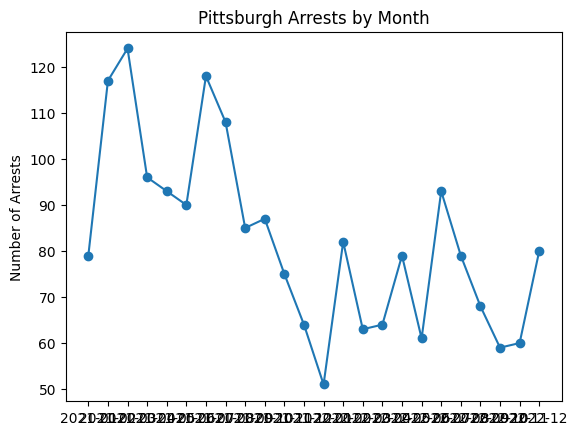

In [46]:
plt.plot(summ_year_2021_2022['MNYR'].loc[summ_year_2021_2022['record_type']=='Arrest'],
         summ_year_2021_2022['rec_count'].loc[summ_year_2021_2022['record_type']=='Arrest'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Month')
plt.ylabel('Number of Arrests')
plt.show()

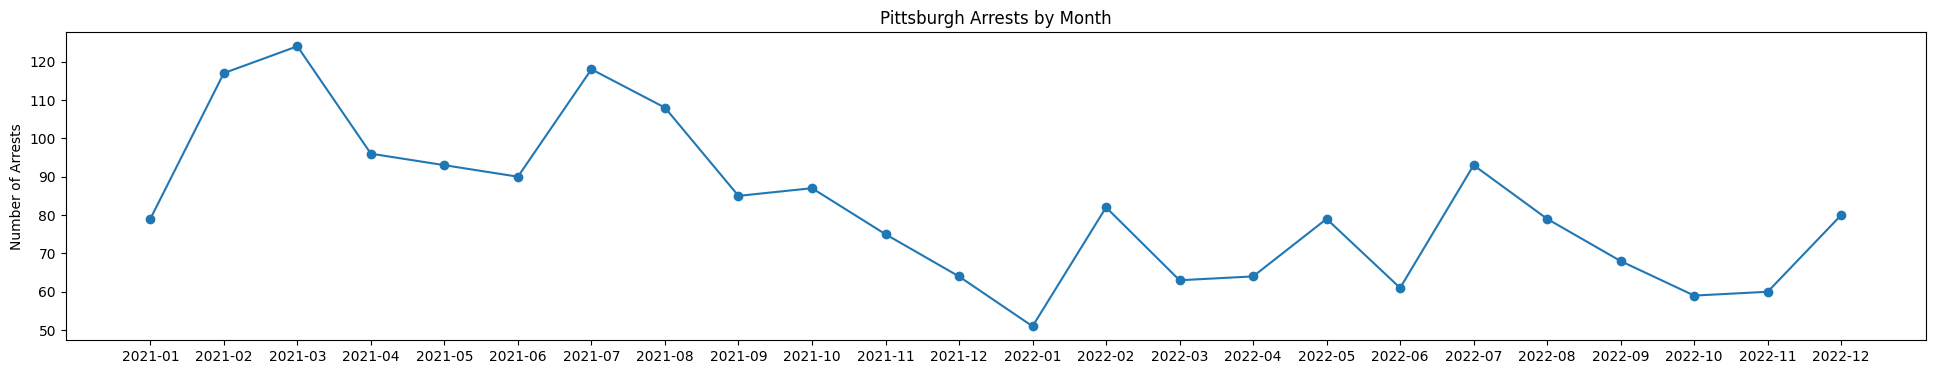

In [47]:
plt.figure(figsize=(24,4))
plt.plot(summ_year_2021_2022['MNYR'].loc[summ_year_2021_2022['record_type']=='Arrest'],
         summ_year_2021_2022['rec_count'].loc[summ_year_2021_2022['record_type']=='Arrest'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Month')
plt.ylabel('Number of Arrests')
plt.show()

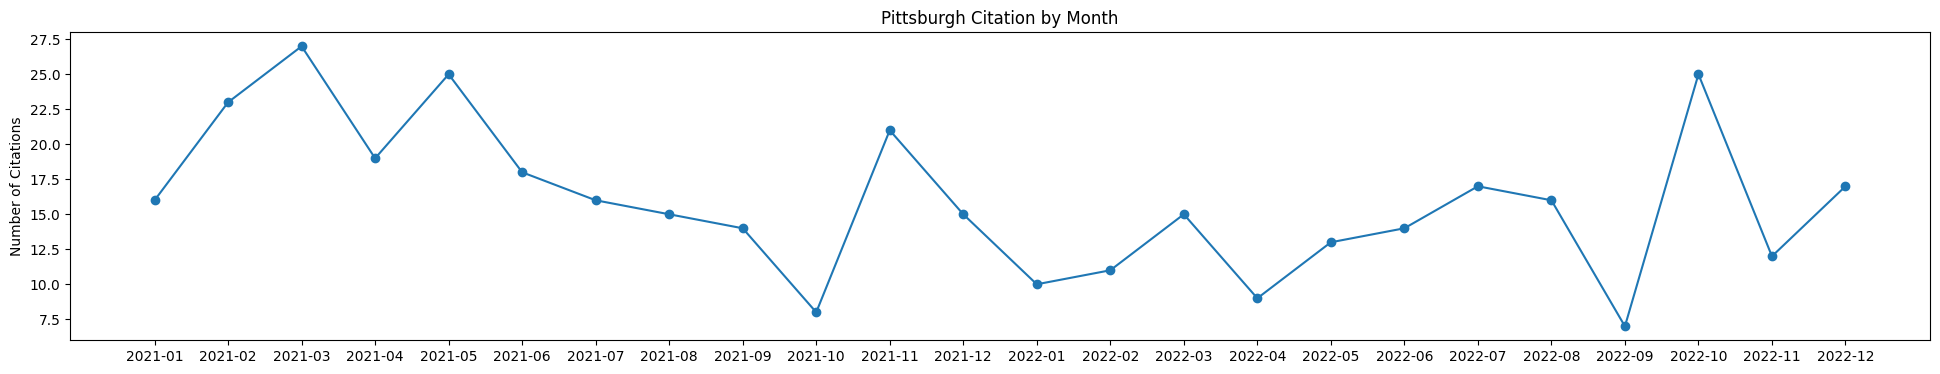

In [48]:
plt.figure(figsize=(24,4))
plt.plot(summ_year_2021_2022['MNYR'].loc[summ_year_2021_2022['record_type']=='Citation'],
         summ_year_2021_2022['rec_count'].loc[summ_year_2021_2022['record_type']=='Citation'], marker='o', linestyle='solid')
plt.title('Pittsburgh Citation by Month')
plt.ylabel('Number of Citations')
plt.show()

## Visualize with Seaborn
https://seaborn.pydata.org/generated/seaborn.lineplot.html

#### Create variables to hold the month - formagtted and as a number

In [49]:
mj_df['MONTH_STR'] = mj_df['TIME'].dt.strftime('%B')

In [50]:
mj_df['MONTH'] = [x.month for x in mj_df['TIME']]

In [51]:
mj_df.head()

,index,_id,PK,CCR,AGE,GENDER,RACE,TIME,ARRESTLOCATION,OFFENSES,...,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,record_type,marijuana_flag,YEAR,MNYR,MONTH_STR,MONTH
0,3851,3852,1979466,16207605,54.0,M,B,2017-01-05 00:02:00,"5th AV & Pride ST Pittsburgh, PA 15219",4910 Tampering with or Fabricating Physical Ev...,...,6.0,3.0,-79.977467,40.438224,Arrest,1,2017,2017-01,January,1
1,3927,3928,1979566,16235765,23.0,F,B,2017-01-09 17:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",4304(a)(1) Endangering Welfare of Children. / ...,...,6.0,3.0,-79.977530,40.438003,Arrest,1,2017,2017-01,January,1
2,4114,4115,1979812,16236311,15.0,M,B,2017-01-06 13:20:00,Zone 2,5503 Disorderly Conduct. / 13(a)(31) Marijuana...,...,NaN,NaN,NaN,NaN,Arrest,1,2017,2017-01,January,1
3,4189,4190,1979900,17000760,34.0,M,W,2017-01-02 09:12:00,"10 Block 40th ST Pittsburgh, PA 15201",13(a)(16) Possession of Controlled Substance /...,...,7.0,2.0,-79.964880,40.470229,Arrest,1,2017,2017-01,January,1
4,4208,4209,1979939,17001618,20.0,M,B,2017-01-03 15:40:00,"44th ST & Calvin ST Pittsburgh, PA 15201",13(a)(16) Possession of Controlled Substance /...,...,7.0,2.0,-79.953776,40.466623,Arrest,1,2017,2017-01,January,1


In [52]:
summ_yr = mj_df.loc[(mj_df['YEAR'] >= 2018) & (mj_df['YEAR'] <= 2022)].\
            groupby(['YEAR', 'record_type']).\
            aggregate(rec_count = ('OFFENSES', 'count')).\
            reset_index().\
            set_index('YEAR').\
            copy()

In [53]:
summ_yr

,record_type,rec_count
YEAR,,
2018,Arrest,2504
2018,Citation,157
2019,Arrest,2392
2019,Citation,236
2020,Arrest,1732
2020,Citation,201
2021,Arrest,1136
2021,Citation,217
2022,Arrest,839


In [54]:
summ_mn_yr = mj_df.loc[(mj_df['YEAR'] >= 2018) & (mj_df['YEAR'] <= 2022)].\
                    groupby(['YEAR', 'MONTH', 'record_type']).\
                    aggregate(rec_count = ('OFFENSES','count')).\
                    reset_index().\
                    set_index('YEAR').\
                    copy()

In [55]:
summ_mn_yr

,MONTH,record_type,rec_count
YEAR,,,
2018,1,Arrest,206
2018,1,Citation,15
2018,2,Arrest,208
2018,2,Citation,13
2018,3,Arrest,255
...,...,...,...
2022,10,Citation,25
2022,11,Arrest,60
2022,11,Citation,12


#### LINEPLOT

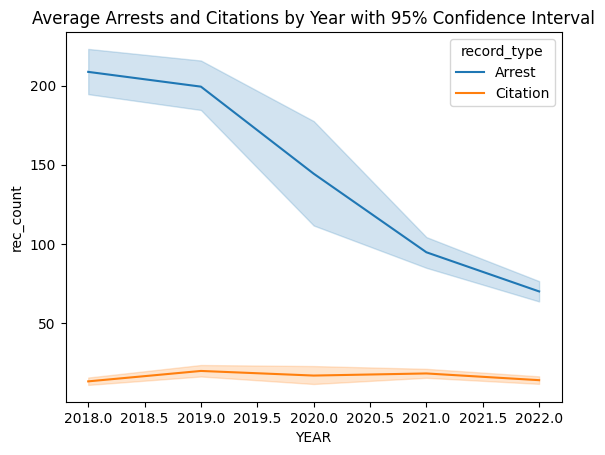

In [56]:
ax = sns.lineplot(data=summ_mn_yr, x='YEAR', y='rec_count', hue='record_type')

#ax.set_xticks([0, 1, 2, 3, 4])
#ax.set_xticklabels(['2018','2019','2020','2021','2022'])

plt.title('Average Arrests and Citations by Year with 95% Confidence Interval')

plt.show()

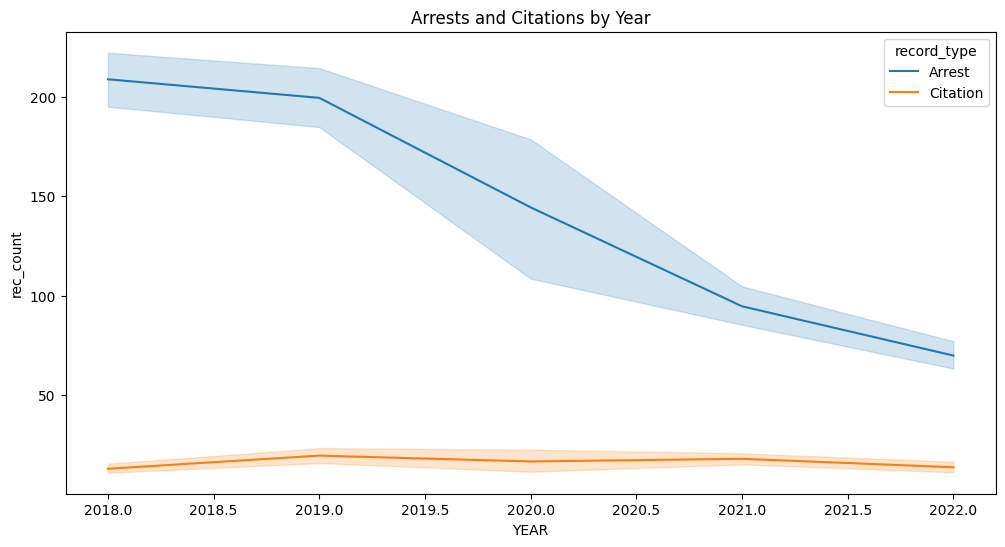

In [57]:
plt.figure(figsize=(12,6))
sns.lineplot(data=summ_mn_yr, x="YEAR", y="rec_count", hue='record_type')
plt.title('Arrests and Citations by Year')
plt.show()

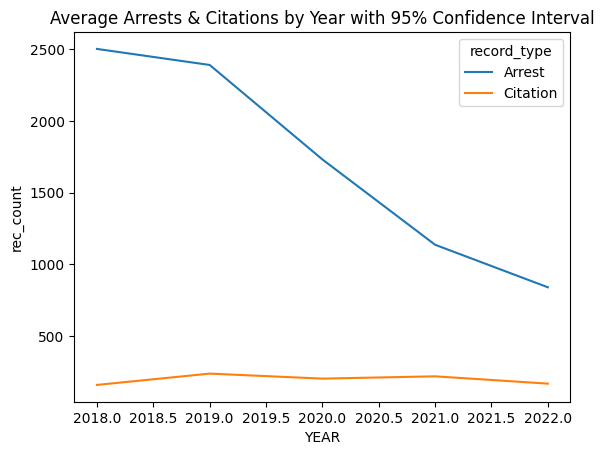

In [58]:
sns.lineplot(data=summ_yr, x='YEAR', y='rec_count', hue='record_type')
plt.title('Average Arrests & Citations by Year with 95% Confidence Interval')
plt.show()

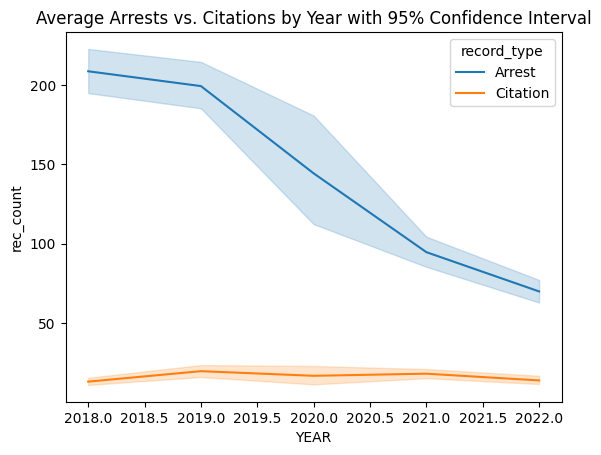

In [59]:
sns.lineplot(data=summ_mn_yr, x='YEAR', y='rec_count', hue='record_type')
plt.title('Average Arrests vs. Citations by Year with 95% Confidence Interval')
plt.show()

#### RELPLOT

In [60]:
mj_df

,index,_id,PK,CCR,AGE,GENDER,RACE,TIME,ARRESTLOCATION,OFFENSES,...,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,record_type,marijuana_flag,YEAR,MNYR,MONTH_STR,MONTH
0,3851,3852,1979466,16207605,54.0,M,B,2017-01-05 00:02:00,"5th AV & Pride ST Pittsburgh, PA 15219",4910 Tampering with or Fabricating Physical Ev...,...,6.0,3.0,-79.977467,40.438224,Arrest,1,2017,2017-01,January,1
1,3927,3928,1979566,16235765,23.0,F,B,2017-01-09 17:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",4304(a)(1) Endangering Welfare of Children. / ...,...,6.0,3.0,-79.977530,40.438003,Arrest,1,2017,2017-01,January,1
2,4114,4115,1979812,16236311,15.0,M,B,2017-01-06 13:20:00,Zone 2,5503 Disorderly Conduct. / 13(a)(31) Marijuana...,...,NaN,NaN,NaN,NaN,Arrest,1,2017,2017-01,January,1
3,4189,4190,1979900,17000760,34.0,M,W,2017-01-02 09:12:00,"10 Block 40th ST Pittsburgh, PA 15201",13(a)(16) Possession of Controlled Substance /...,...,7.0,2.0,-79.964880,40.470229,Arrest,1,2017,2017-01,January,1
4,4208,4209,1979939,17001618,20.0,M,B,2017-01-03 15:40:00,"44th ST & Calvin ST Pittsburgh, PA 15201",13(a)(16) Possession of Controlled Substance /...,...,7.0,2.0,-79.953776,40.466623,Arrest,1,2017,2017-01,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12607,14207,23810,1102683,22206375,29.0,M,B,2022-12-28 20:43:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,9.0,2.0,-79.915806,40.460814,Citation,1,2022,2022-12,December,12
12608,14211,23814,1102687,22206961,19.0,M,W,2022-12-30 02:00:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,3.0,5.0,-80.000256,40.430975,Citation,1,2022,2022-12,December,12
12609,14212,23815,1102688,22206961,19.0,M,B,2022-12-30 02:00:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,3.0,5.0,-80.000256,40.430975,Citation,1,2022,2022-12,December,12
12610,14213,23816,1102689,22206961,20.0,M,B,2022-12-30 02:00:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,3.0,5.0,-80.000256,40.430975,Citation,1,2022,2022-12,December,12


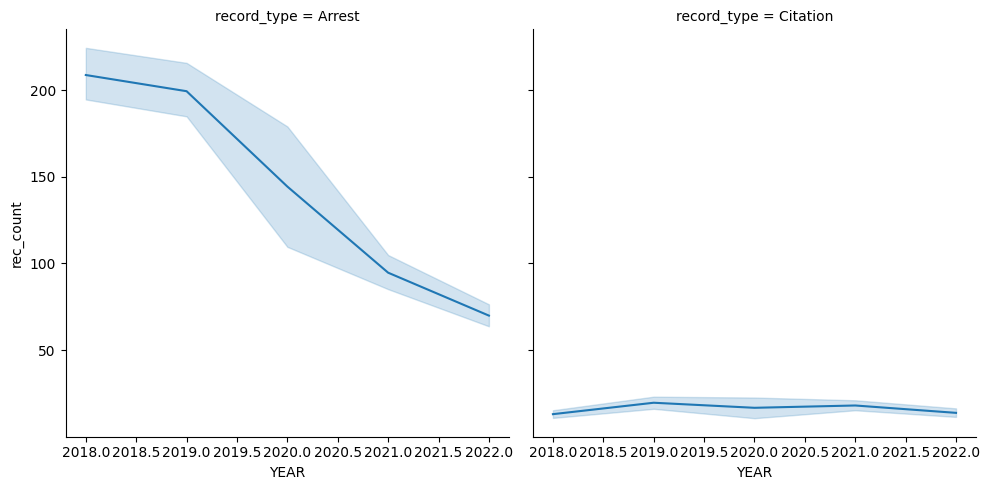

In [61]:
sns.relplot(
      data=summ_mn_yr, x='YEAR', y='rec_count', col='record_type',
                kind='line'
)
plt.show()

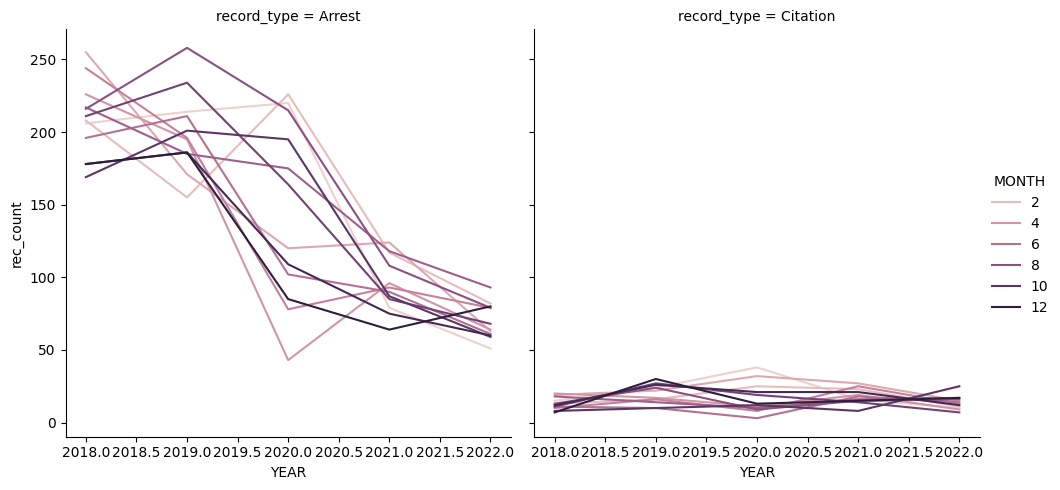

In [62]:
sns.relplot(
    data=summ_mn_yr, x='YEAR', y='rec_count', col='record_type',
    hue='MONTH', kind='line',
)
plt.show()

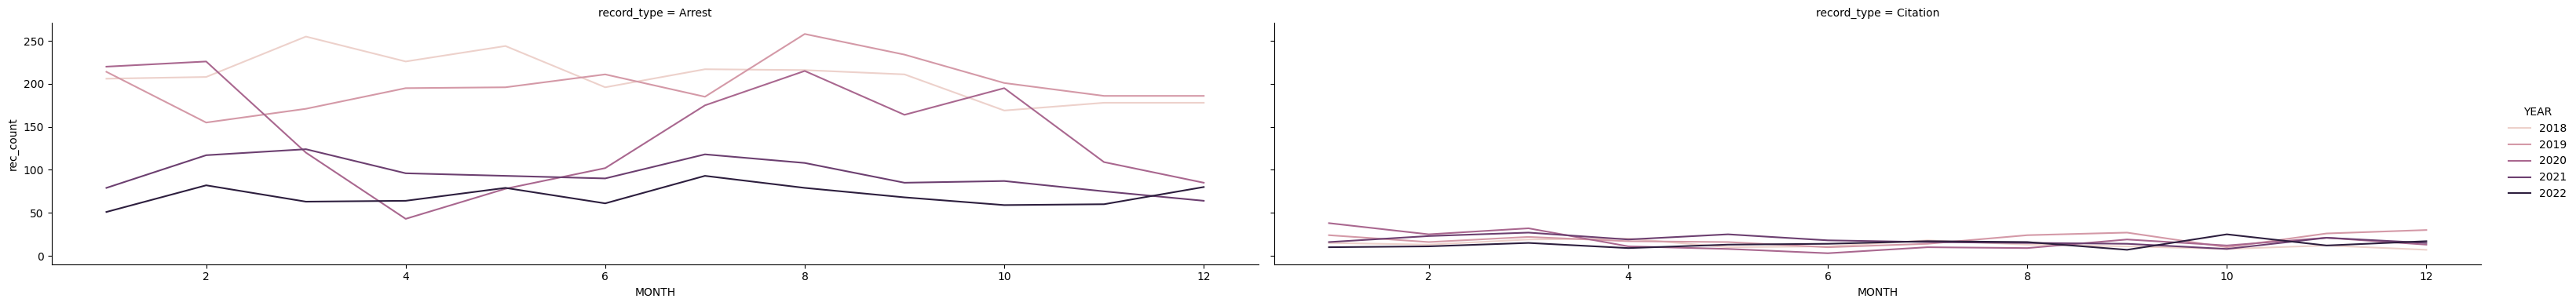

In [63]:
sns.relplot(
    data=summ_mn_yr, x='MONTH', y='rec_count', col='record_type',
    hue='YEAR', kind='line', height=4, aspect=4,
)
plt.show()

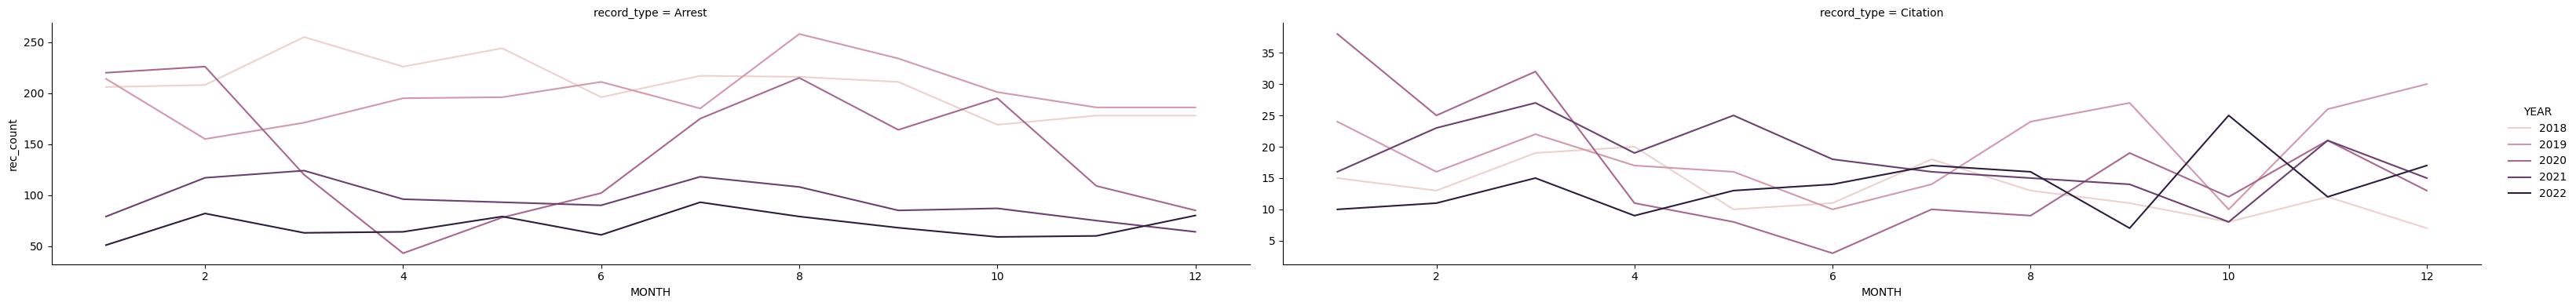

In [64]:
sns.relplot(
    data=summ_mn_yr, x='MONTH', y='rec_count', col='record_type',
    hue='YEAR', kind='line', height=4, aspect=4, facet_kws={'sharey':False}
)
plt.show()

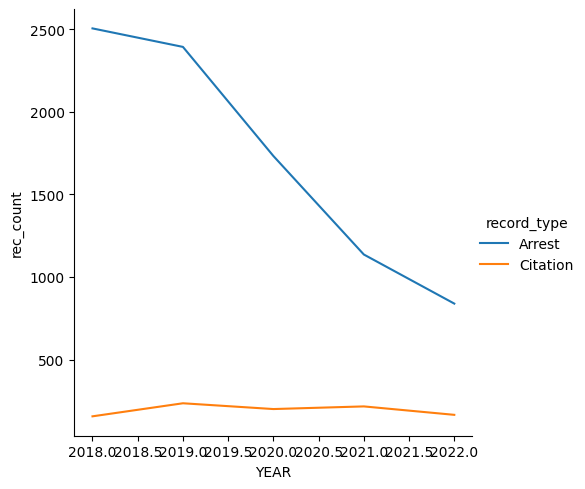

In [65]:
sns.relplot(
    data=summ_yr, x='YEAR', y='rec_count',
    hue='record_type', kind='line',
)
plt.show()

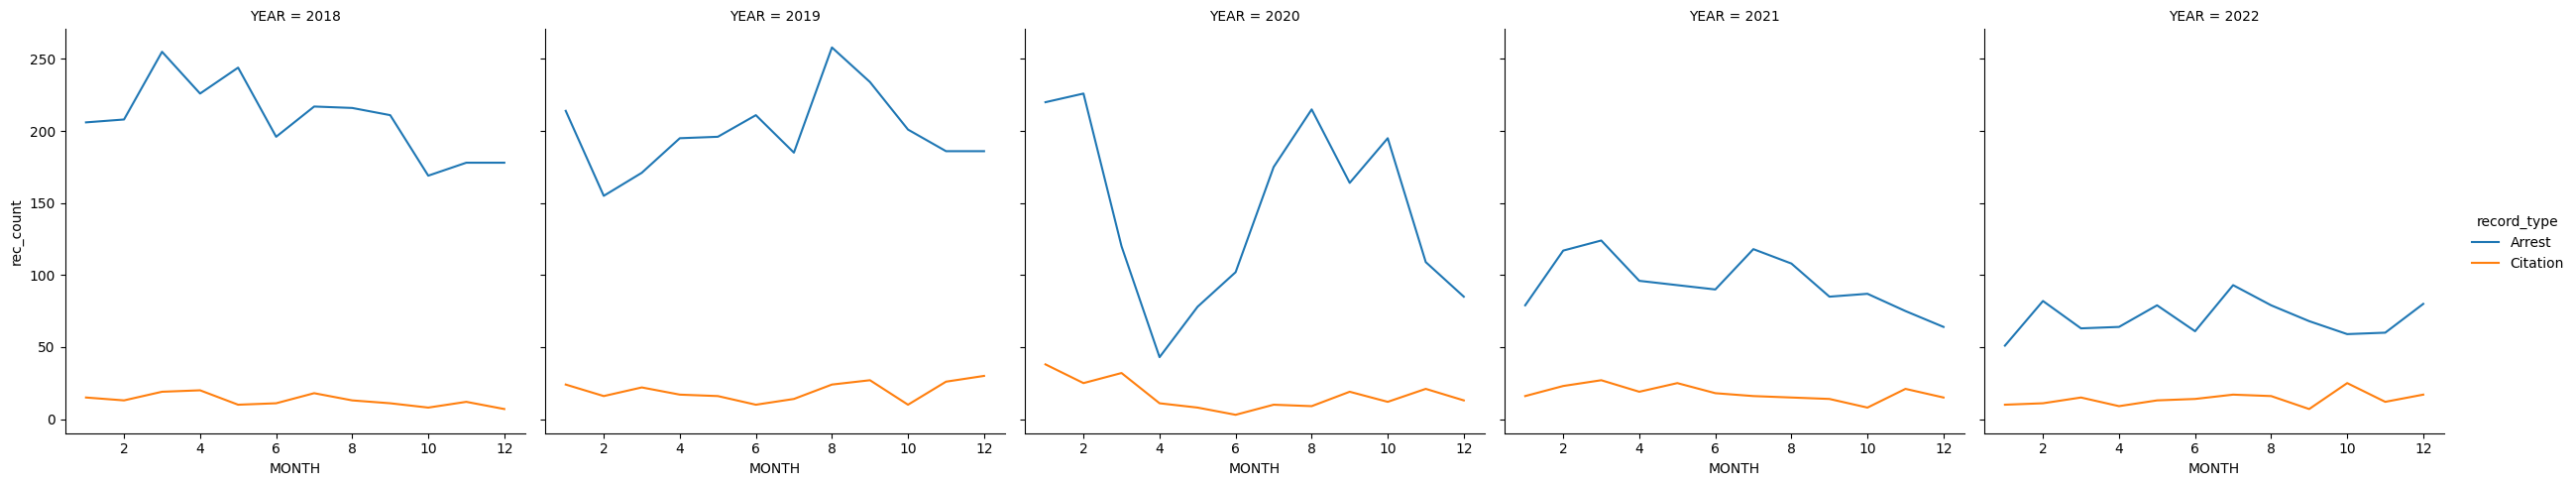

In [66]:
sns.relplot(
    data=summ_mn_yr, x='MONTH', y='rec_count', col='YEAR',
    hue='record_type', kind='line',
)
plt.show()

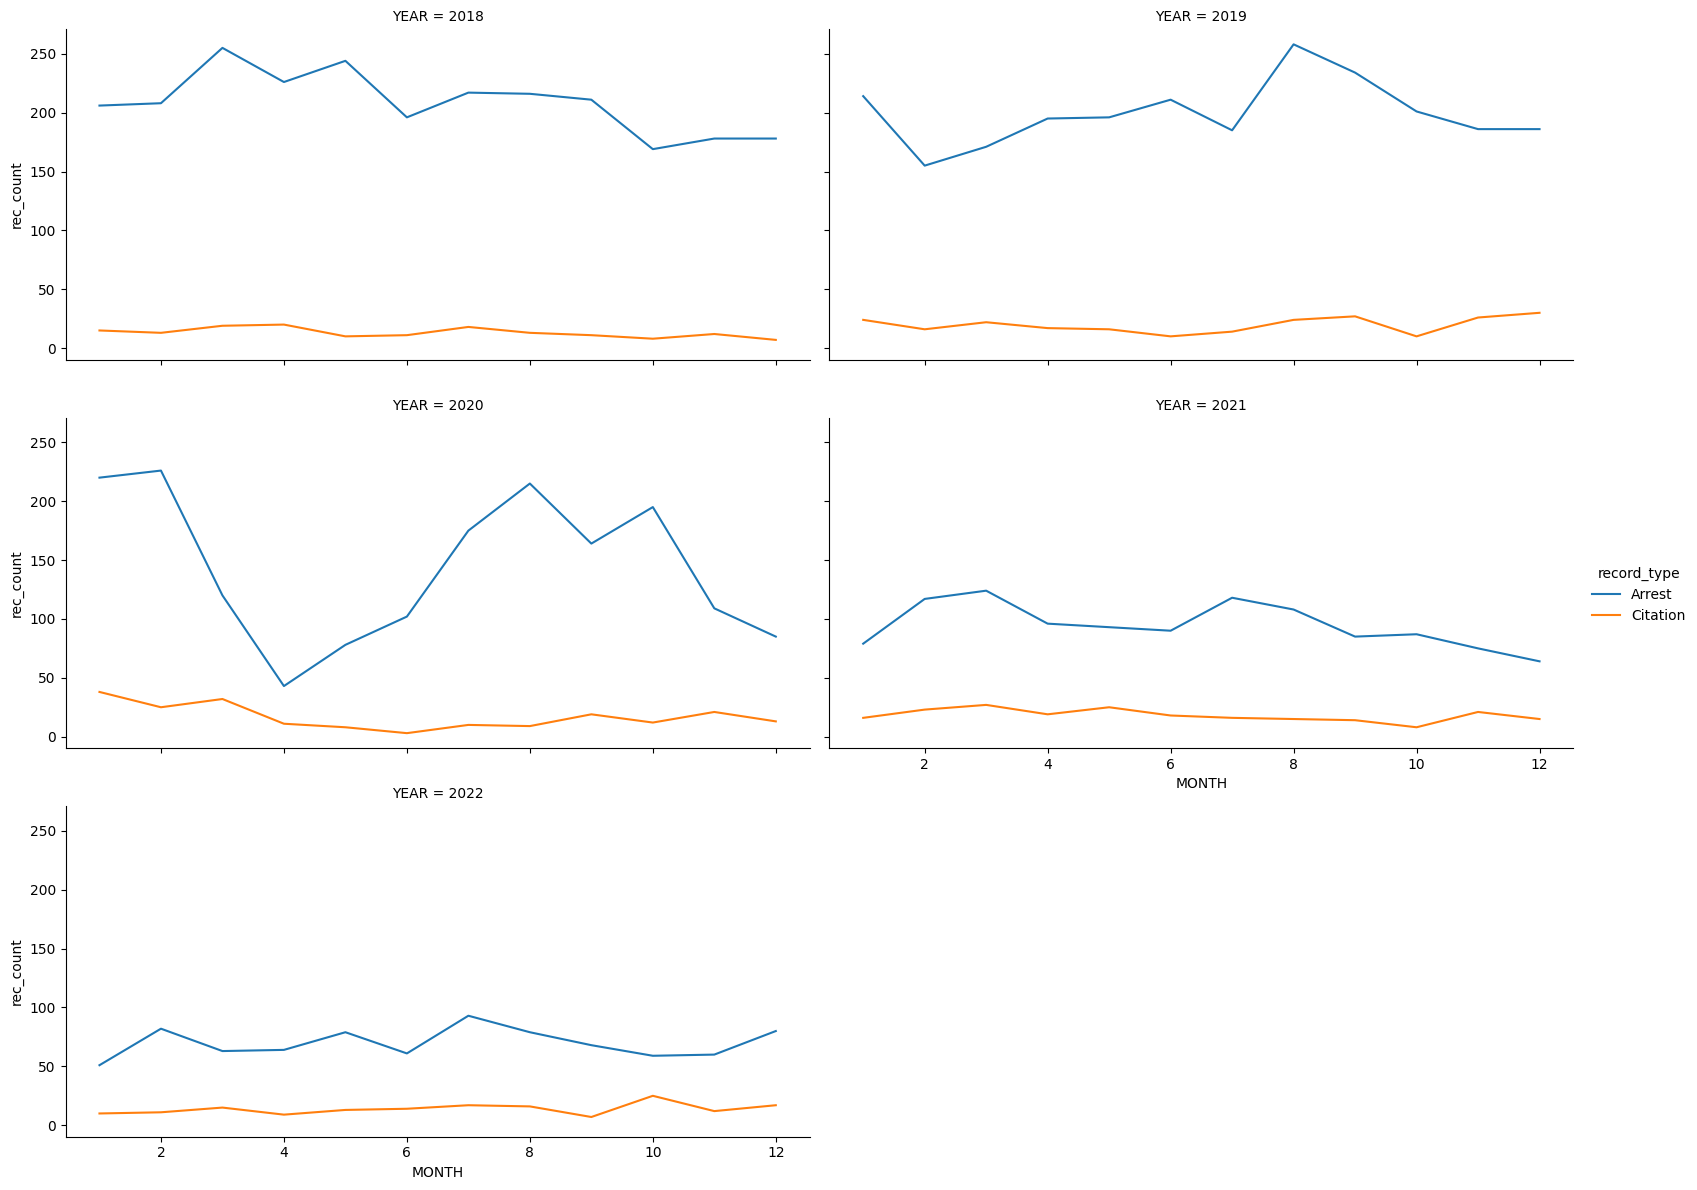

In [67]:
sns.relplot(
    data=summ_mn_yr, x='MONTH', y='rec_count', col='YEAR',
    col_wrap=2, hue='record_type', kind='line', height=4, aspect=2
)
plt.show()

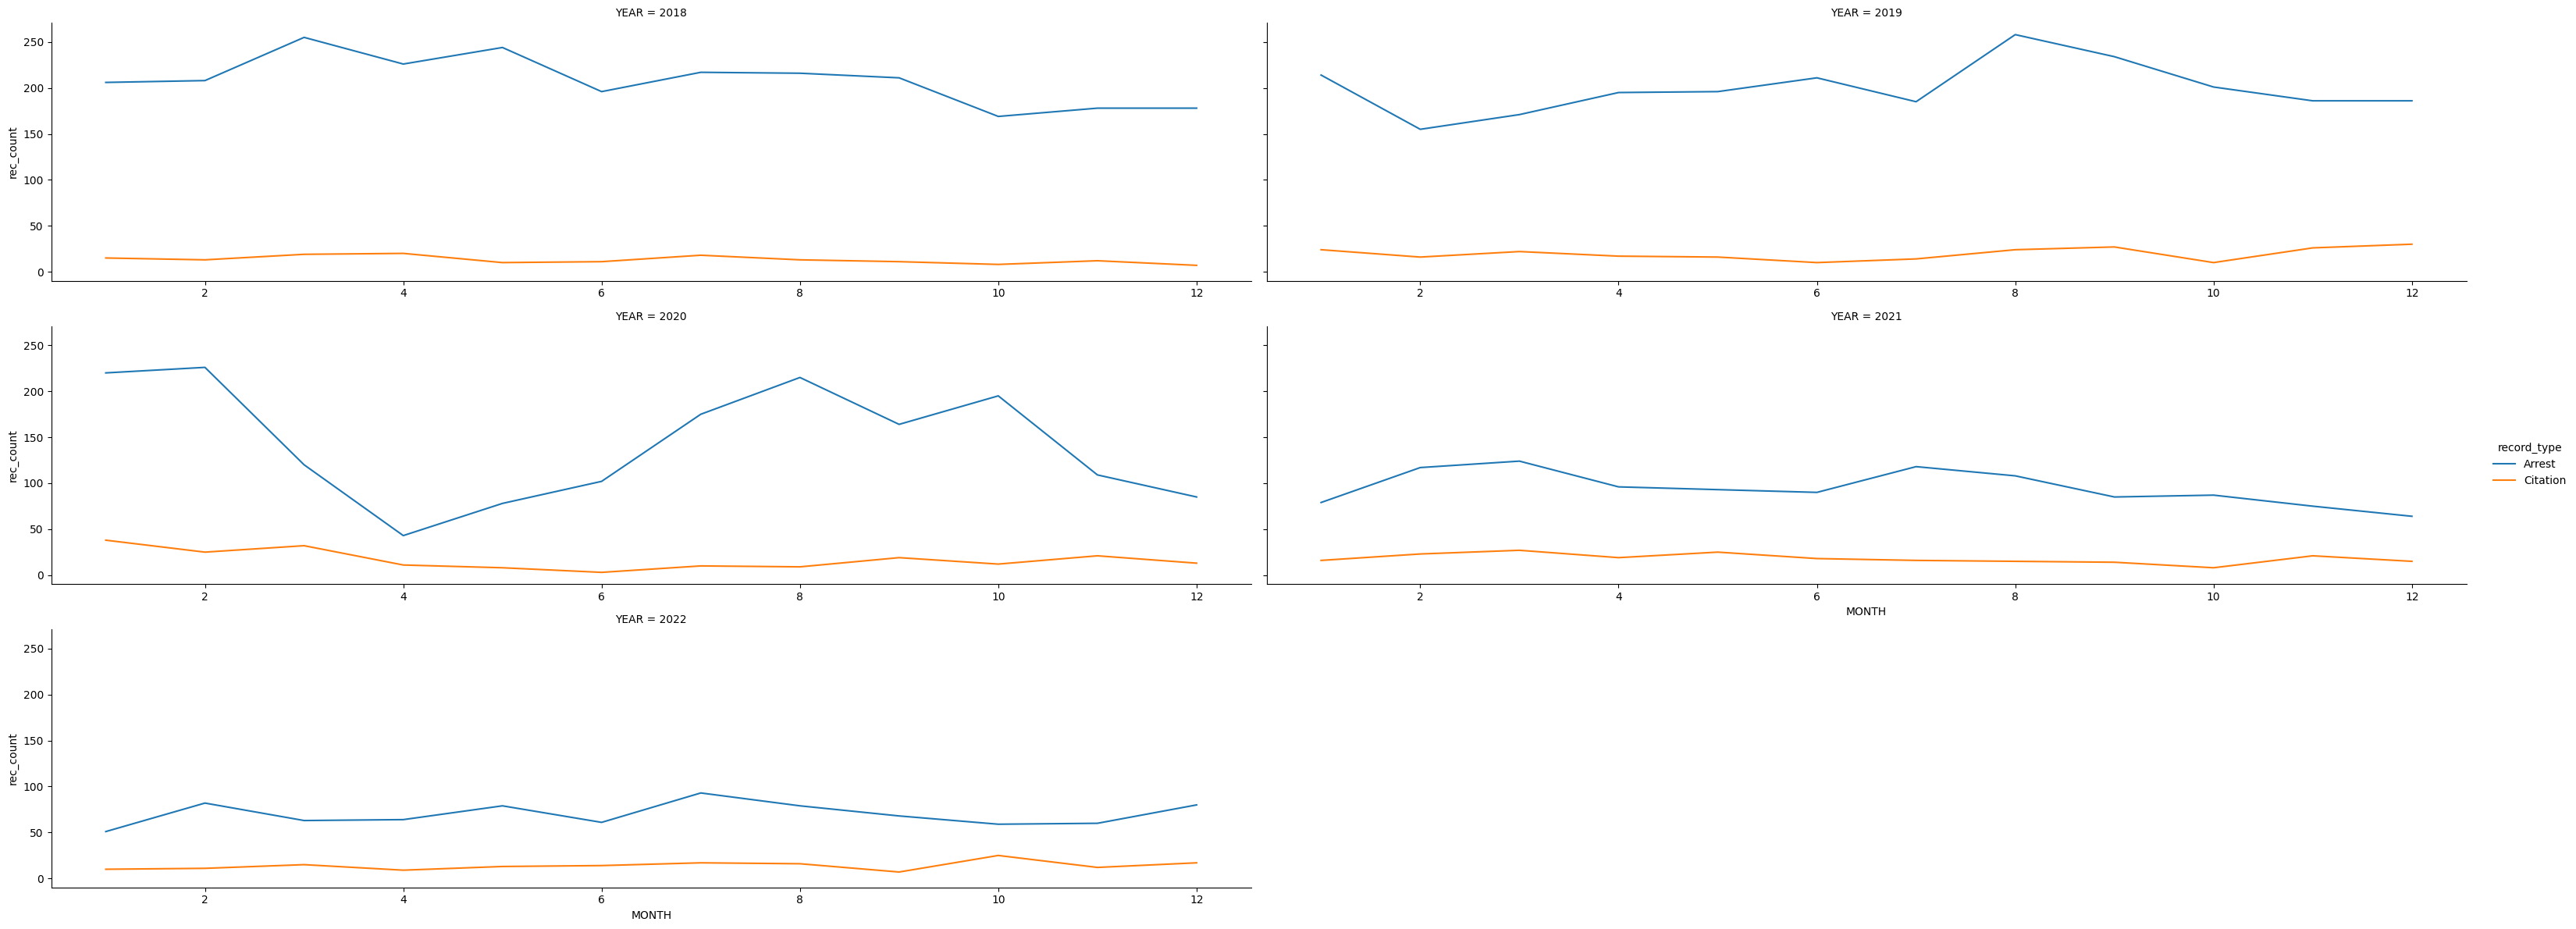

In [68]:
sns.relplot(
    data=summ_mn_yr, x='MONTH', y='rec_count', col='YEAR',
    col_wrap=2, hue='record_type', kind='line', height=4, aspect=4,
    facet_kws={'sharex':False}
)
plt.show()

#### CATPLOT

use the un-summarizied data `mj_df`

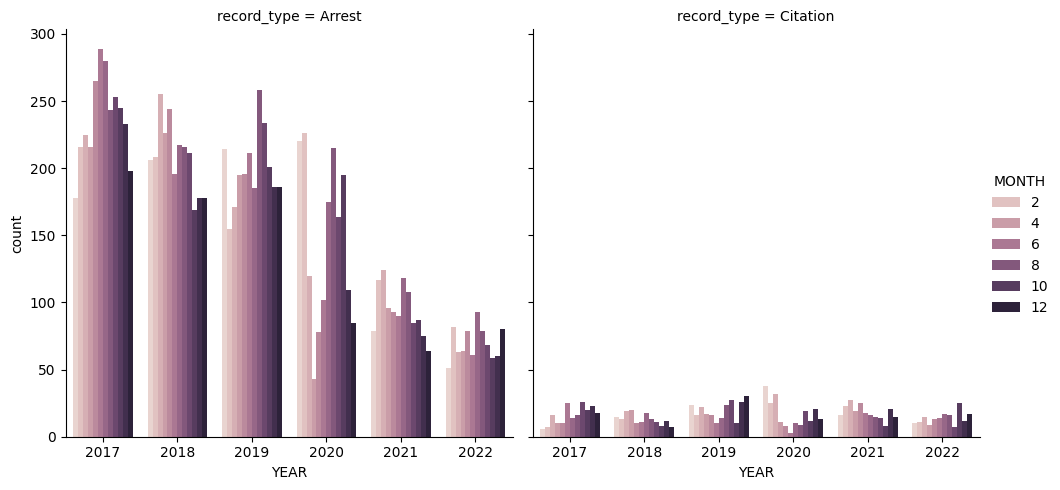

In [69]:
sns.catplot(
    data=mj_df, x='YEAR', col='record_type',
    hue='MONTH', kind='count',
)
plt.show()

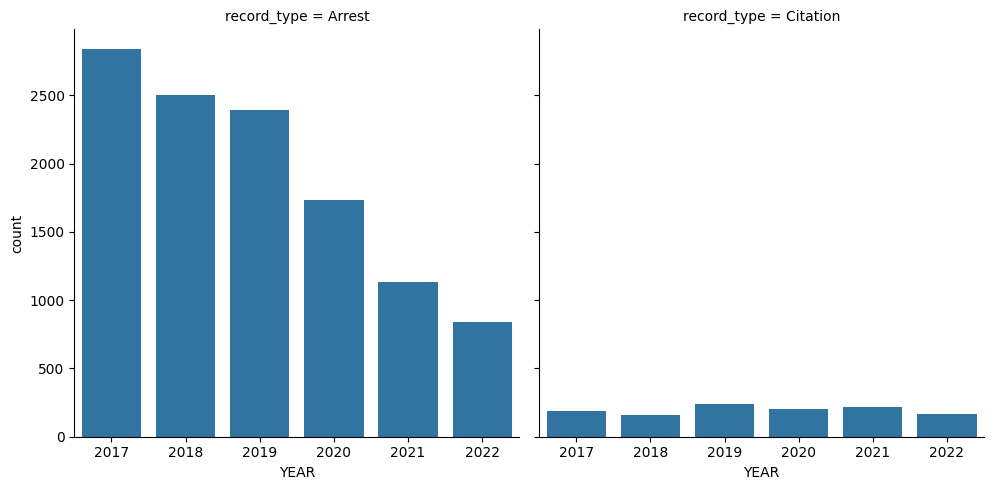

In [70]:
sns.catplot(
    data=mj_df, x='YEAR', col='record_type',
    kind='count',
)
plt.show()

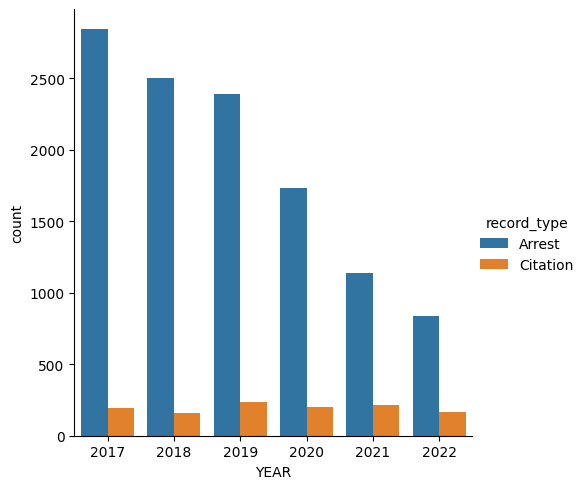

In [71]:
sns.catplot(
    data=mj_df, x='YEAR',
    hue='record_type', kind='count',
)
plt.show()

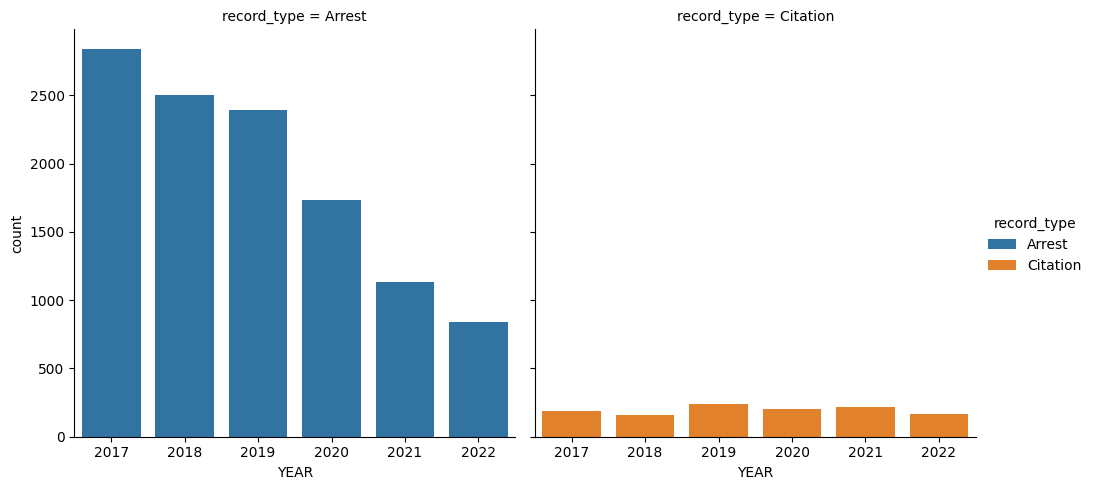

In [72]:
sns.catplot(
    data=mj_df, x='YEAR', col='record_type',
    hue='record_type', kind='count',
)
plt.show()

## Stacked Bar Charts

#### Select races ['B','H','W'], group by zone, race, and record_type, and aggregate to get count of each race for each zone and record_type.

In [73]:
mj_by_zone_by_race_BHW = mj_df.loc[mj_df['RACE'].isin(['B','H','W'])].\
            groupby(['INCIDENTZONE', 'RACE', 'record_type']).\
            aggregate(mj_count_zone_race = ('OFFENSES', 'count')).\
            reset_index().\
            copy()

In [74]:
mj_by_zone_by_race_BHW

,INCIDENTZONE,RACE,record_type,mj_count_zone_race
0,OSC,B,Arrest,103
1,OSC,B,Citation,4
2,OSC,W,Arrest,37
3,Zone 1,B,Arrest,1768
4,Zone 1,B,Citation,85
5,Zone 1,H,Arrest,15
6,Zone 1,W,Arrest,1153
7,Zone 1,W,Citation,18
8,Zone 2,B,Arrest,1095
9,Zone 2,B,Citation,80


In [75]:
zone_race_pivot = mj_by_zone_by_race_BHW.pivot(index=['INCIDENTZONE', 'record_type'], columns='RACE', values='mj_count_zone_race').\
                  copy()

In [76]:
zone_race_pivot

RACE                           B     H       W
INCIDENTZONE record_type                      
OSC          Arrest        103.0   NaN    37.0
             Citation        4.0   NaN     NaN
Zone 1       Arrest       1768.0  15.0  1153.0
             Citation       85.0   NaN    18.0
Zone 2       Arrest       1095.0  13.0   491.0
             Citation       80.0   1.0    18.0
Zone 3       Arrest        897.0  15.0  1015.0
             Citation      169.0   2.0    73.0
Zone 4       Arrest        532.0   7.0   390.0
             Citation       99.0   2.0    55.0
Zone 5       Arrest       2307.0  15.0   578.0
             Citation      395.0   5.0    24.0
Zone 6       Arrest        413.0   7.0   438.0
             Citation       82.0   NaN    30.0

In [77]:
mj_zone_race_pvt = mj_by_zone_by_race_BHW.pivot(index=['INCIDENTZONE', 'record_type'], columns='RACE', values='mj_count_zone_race').\
                  reset_index().\
                  copy()

In [78]:
mj_zone_race_pvt

RACE,INCIDENTZONE,record_type,B,H,W
0,OSC,Arrest,103.0,NaN,37.0
1,OSC,Citation,4.0,NaN,NaN
2,Zone 1,Arrest,1768.0,15.0,1153.0
3,Zone 1,Citation,85.0,NaN,18.0
4,Zone 2,Arrest,1095.0,13.0,491.0
5,Zone 2,Citation,80.0,1.0,18.0
6,Zone 3,Arrest,897.0,15.0,1015.0
7,Zone 3,Citation,169.0,2.0,73.0
8,Zone 4,Arrest,532.0,7.0,390.0
9,Zone 4,Citation,99.0,2.0,55.0


Text(0, 0.5, 'Count Ranges')

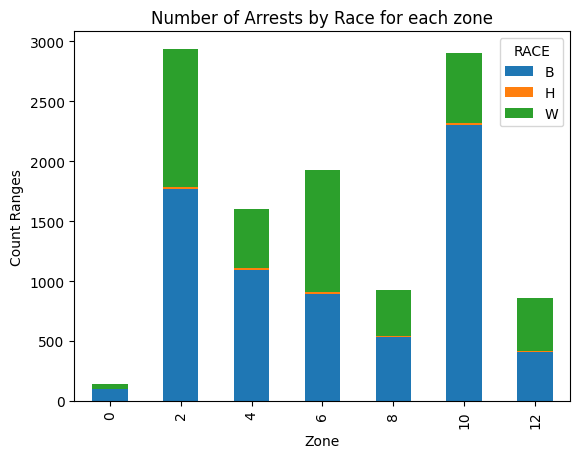

In [79]:
# create stacked bar chart
mj_zone_race_pvt.loc[mj_zone_race_pvt['record_type'] == 'Arrest'].\
    plot(kind='bar', stacked=True)

# Add Title and Labels
plt.title('Number of Arrests by Race for each zone')
plt.xlabel('Zone')
plt.ylabel('Count Ranges')

Recall the summarized zone data from when we did pie charts. This includes all races so we need to do the aggregation again with only ['B','H','W'].

In [80]:
mj_by_zone.head(4)

,INCIDENTZONE,record_type,mj_count_zone
0,OSC,Arrest,141
1,OSC,Citation,4
2,Zone 1,Arrest,2966
3,Zone 1,Citation,105


In [81]:
mj_by_zone_BHW = mj_df.loc[mj_df['RACE'].isin(['B','H','W'])].\
            groupby(['INCIDENTZONE', 'record_type']).\
            aggregate(mj_count_zone = ('OFFENSES', 'count')).\
            reset_index().\
            copy()

In [82]:
mj_by_zone_BHW

,INCIDENTZONE,record_type,mj_count_zone
0,OSC,Arrest,140
1,OSC,Citation,4
2,Zone 1,Arrest,2936
3,Zone 1,Citation,103
4,Zone 2,Arrest,1599
5,Zone 2,Citation,99
6,Zone 3,Arrest,1927
7,Zone 3,Citation,244
8,Zone 4,Arrest,929
9,Zone 4,Citation,156


Merge `mj_zone_race_pvt` with `mj_by_zone` so that the total counts for each zone and record_type are added to the `mj_zone_race_pvt` data. The merge method requires one or more columns to match rows from one dataframe to the other.

In [83]:
mj_zone_race_with_totals = mj_zone_race_pvt.merge(mj_by_zone_BHW, how='left', on=['INCIDENTZONE', 'record_type'])

In [84]:
mj_zone_race_with_totals

,INCIDENTZONE,record_type,B,H,W,mj_count_zone
0,OSC,Arrest,103.0,NaN,37.0,140
1,OSC,Citation,4.0,NaN,NaN,4
2,Zone 1,Arrest,1768.0,15.0,1153.0,2936
3,Zone 1,Citation,85.0,NaN,18.0,103
4,Zone 2,Arrest,1095.0,13.0,491.0,1599
5,Zone 2,Citation,80.0,1.0,18.0,99
6,Zone 3,Arrest,897.0,15.0,1015.0,1927
7,Zone 3,Citation,169.0,2.0,73.0,244
8,Zone 4,Arrest,532.0,7.0,390.0,929
9,Zone 4,Citation,99.0,2.0,55.0,156


Calculate the proportion of each race in each zone.

In [85]:
mj_zone_race_with_totals['B_prop'] = mj_zone_race_with_totals['B']/mj_zone_race_with_totals['mj_count_zone']

In [86]:
mj_zone_race_with_totals['H_prop'] = mj_zone_race_with_totals['H']/mj_zone_race_with_totals['mj_count_zone']

In [87]:
mj_zone_race_with_totals['W_prop'] = mj_zone_race_with_totals['W']/mj_zone_race_with_totals['mj_count_zone']

In [88]:
mj_zone_race_with_totals

,INCIDENTZONE,record_type,B,H,W,mj_count_zone,B_prop,H_prop,W_prop
0,OSC,Arrest,103.0,NaN,37.0,140,0.735714,NaN,0.264286
1,OSC,Citation,4.0,NaN,NaN,4,1.000000,NaN,NaN
2,Zone 1,Arrest,1768.0,15.0,1153.0,2936,0.602180,0.005109,0.392711
3,Zone 1,Citation,85.0,NaN,18.0,103,0.825243,NaN,0.174757
4,Zone 2,Arrest,1095.0,13.0,491.0,1599,0.684803,0.008130,0.307067
5,Zone 2,Citation,80.0,1.0,18.0,99,0.808081,0.010101,0.181818
6,Zone 3,Arrest,897.0,15.0,1015.0,1927,0.465490,0.007784,0.526725
7,Zone 3,Citation,169.0,2.0,73.0,244,0.692623,0.008197,0.299180
8,Zone 4,Arrest,532.0,7.0,390.0,929,0.572659,0.007535,0.419806
9,Zone 4,Citation,99.0,2.0,55.0,156,0.634615,0.012821,0.352564


In [89]:
mj_zone_race_with_totals.columns

Index(['INCIDENTZONE', 'record_type', 'B', 'H', 'W', 'mj_count_zone', 'B_prop',
       'H_prop', 'W_prop'],
      dtype='object')

In [90]:
proportions_df = mj_zone_race_with_totals.loc[:,['INCIDENTZONE',
                                                        'record_type',
                                                        'B_prop',
                                                        'H_prop',
                                                        'W_prop']].\
                                              copy()

In [91]:
proportions_df

,INCIDENTZONE,record_type,B_prop,H_prop,W_prop
0,OSC,Arrest,0.735714,NaN,0.264286
1,OSC,Citation,1.000000,NaN,NaN
2,Zone 1,Arrest,0.602180,0.005109,0.392711
3,Zone 1,Citation,0.825243,NaN,0.174757
4,Zone 2,Arrest,0.684803,0.008130,0.307067
5,Zone 2,Citation,0.808081,0.010101,0.181818
6,Zone 3,Arrest,0.465490,0.007784,0.526725
7,Zone 3,Citation,0.692623,0.008197,0.299180
8,Zone 4,Arrest,0.572659,0.007535,0.419806
9,Zone 4,Citation,0.634615,0.012821,0.352564


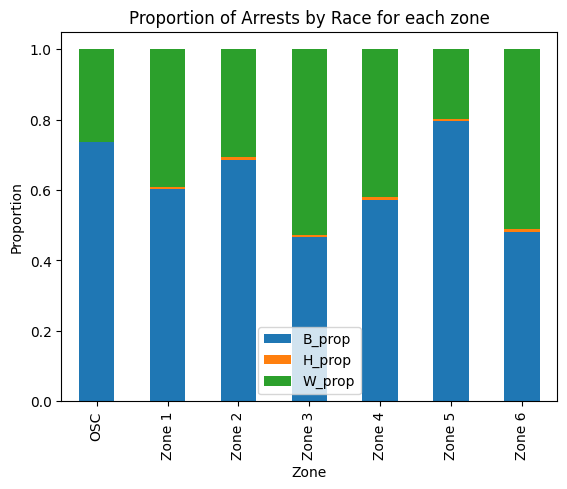

In [92]:
# create stacked bar chart
proportions_df.loc[proportions_df['record_type'] == 'Arrest'].\
    plot(x='INCIDENTZONE', kind='bar', stacked=True)

# Add Title and Labels
plt.title('Proportion of Arrests by Race for each zone')
plt.xlabel('Zone')
plt.ylabel('Proportion')
plt.show()

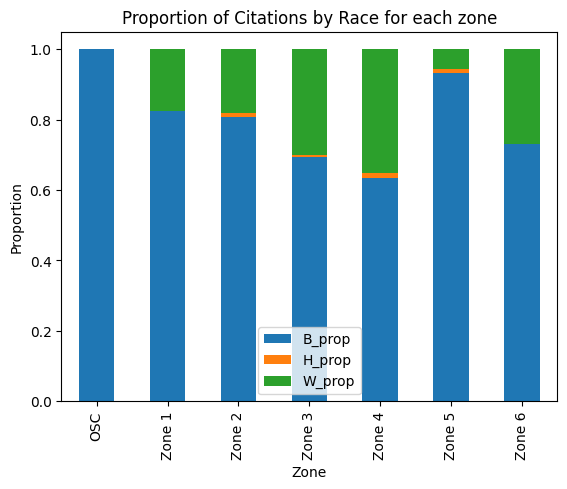

In [93]:
# create stacked bar chart
proportions_df.loc[proportions_df['record_type'] == 'Citation'].\
    plot(x='INCIDENTZONE', kind='bar', stacked=True)

# Add Title and Labels
plt.title('Proportion of Citations by Race for each zone')
plt.xlabel('Zone')
plt.ylabel('Proportion')
plt.show()

### Line charts by month

In [94]:
summ_mn_yr = mj_df.loc[(mj_df['YEAR'] >= 2018) & (mj_df['YEAR'] <= 2022)].\
            groupby(['YEAR', 'MONTH', 'record_type']).\
            aggregate(rec_count = ('OFFENSES', 'count')).\
            reset_index().\
            copy()

In [95]:
summ_mn_yr.pivot(index=['record_type','YEAR'], columns='MONTH', values='rec_count')

MONTH              1    2    3    4    5    6    7    8    9    10   11   12
record_type YEAR                                                            
Arrest      2018  206  208  255  226  244  196  217  216  211  169  178  178
            2019  214  155  171  195  196  211  185  258  234  201  186  186
            2020  220  226  120   43   78  102  175  215  164  195  109   85
            2021   79  117  124   96   93   90  118  108   85   87   75   64
            2022   51   82   63   64   79   61   93   79   68   59   60   80
Citation    2018   15   13   19   20   10   11   18   13   11    8   12    7
            2019   24   16   22   17   16   10   14   24   27   10   26   30
            2020   38   25   32   11    8    3   10    9   19   12   21   13
            2021   16   23   27   19   25   18   16   15   14    8   21   15
            2022   10   11   15    9   13   14   17   16    7   25   12   17

In [96]:
summ_mn_yr.pivot(index=['record_type','YEAR'], columns='MONTH', values='rec_count').\
    reset_index()

MONTH,record_type,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,Arrest,2018,206,208,255,226,244,196,217,216,211,169,178,178
1,Arrest,2019,214,155,171,195,196,211,185,258,234,201,186,186
2,Arrest,2020,220,226,120,43,78,102,175,215,164,195,109,85
3,Arrest,2021,79,117,124,96,93,90,118,108,85,87,75,64
4,Arrest,2022,51,82,63,64,79,61,93,79,68,59,60,80
5,Citation,2018,15,13,19,20,10,11,18,13,11,8,12,7
6,Citation,2019,24,16,22,17,16,10,14,24,27,10,26,30
7,Citation,2020,38,25,32,11,8,3,10,9,19,12,21,13
8,Citation,2021,16,23,27,19,25,18,16,15,14,8,21,15
9,Citation,2022,10,11,15,9,13,14,17,16,7,25,12,17


In [97]:
mj_wide = summ_mn_yr.pivot(index=['record_type','YEAR'], columns='MONTH', values='rec_count').\
    reset_index().\
    copy()

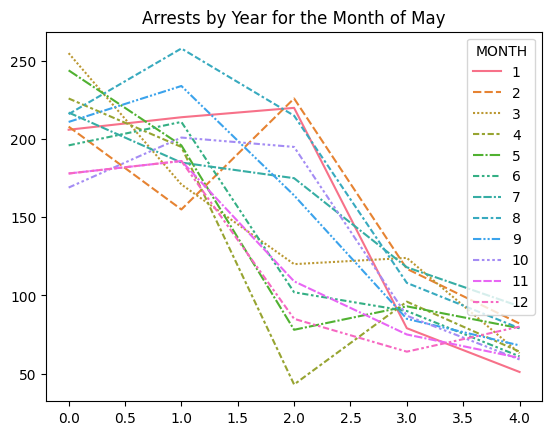

In [98]:
sns.lineplot(data=mj_wide.loc[mj_wide['record_type'] == 'Arrest'].drop(columns='YEAR'))
plt.title('Arrests by Year for the Month of May')
plt.show()

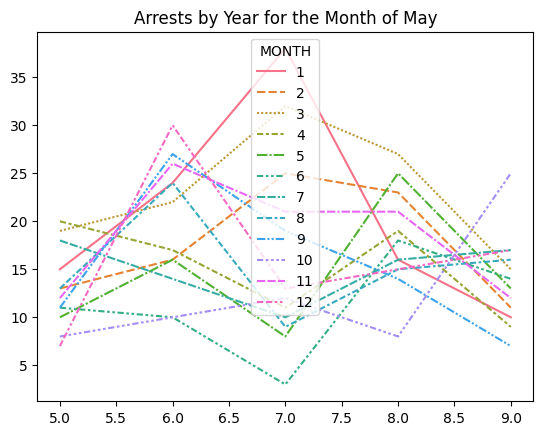

In [99]:
sns.lineplot(data=mj_wide.loc[mj_wide['record_type'] == 'Citation'].drop(columns='YEAR'))
plt.title('Arrests by Year for the Month of May')
plt.show()